In [4]:
!pip install --ignore-installed Pillow==9.0.0

^C


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import cv2
import matplotlib.pyplot as plt

from PIL import ImageTk
import PIL.Image

import tkinter as tk
from tkinter import *
from tkinter import filedialog as fd
import tkinter 
from tkinter import messagebox
from tkinter import filedialog
from tkinter import PhotoImage

In [ ]:

main_win = tkinter.Tk("Age Net")
main_win.geometry("1000x500")
main_win.sourceFile = ''
label_path=''
filepath=''



def chooseFile():
    
    main_win.sourceFile = filedialog.askopenfilename(parent=main_win, initialdir= "C:\\Users\\gilge\\Desktop", title='Please select a directory')
    filepath= main_win.sourceFile
    label = tk.Label(main_win, text=main_win.sourceFile).pack()
    image = ImageTk.PhotoImage(PIL.Image.open(main_win.sourceFile))
    image_label = tk.Label(main_win, image=image).pack()
    status_label = tk.Label(main_win, text="Selected", bg="green").pack()
    textbox.insert(END, "")
    textbox.insert(END, filepath)
  

 
   
    messagebox.showinfo("File Selected Successfully",filepath)
    
    
def action_start():
    # Python program to specify the file
    image = cv2.imread(main_win.sourceFile) #loading input image
    image = cv2.resize(image, (224, 224), interpolation = cv2.INTER_AREA) #resizing to input shape
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #chaging to grayscale format
    #img = cv2.bitwise_not(img) #the color scale was inverted, correcting inverted color scale
    #img = cv2.Canny(img, 224, 224) # removing noise
    plt.imshow(image, vmin=0, vmax=1)
    plt.show()
    #print("image ",image)
    predict_data = np.array([image])/255 #changing image data to array
 
    #print("numpy array",predict_data)
    #balanced trained model with child  age range 30
    agenet_class=load_model('model/agenet_class.h5',compile=False)
    agenet= load_model('model/agenet.h5',compile=False)
    agenet_reg = load_model('model/agenet_reg.h5', compile=False) #loading pre-savedd model
    #classification output model
    yhat = agenet_class.predict(predict_data)
    #combined output model
    prediction,classification = agenet.predict(predict_data)
    
    #regression output model
    pred =agenet_reg.predict(predict_data)
    #classification 
    index = np.argmax(yhat)
    index2 =np.argmax(classification)
    if index==0:
        label="(13-17)"
    if  index==1:
        label ="(18-25)"
    if  index==2:
        label ="(26-30)"       
    if index2==0:
        label="(13-17)"
    if  index2==1:
        label ="(18-25)"
    if  index2==2:
        label ="(26-30)" 
    classoutput ="Classification Results Age Range : ",label
    comboutput="Combined Model: ","this person is between the age range of", label," and age ",prediction
    regoutput="Regression Model: Age is ",pred
    messagebox.showinfo("Classification Result",classoutput)
    messagebox.showinfo("Regression Result",regoutput)
    messagebox.showinfo("Multi-Task Result",comboutput)
    
    
    
    
    
    
def action_utk():
    # Python program to specify the file
    image = cv2.imread(main_win.sourceFile) #loading input image
    image = cv2.resize(image, (224, 224), interpolation = cv2.INTER_AREA) #resizing to input shape
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #chaging to grayscale format
    #img = cv2.bitwise_not(img) #the color scale was inverted, correcting inverted color scale
    #img = cv2.Canny(img, 224, 224) # removing noise
    plt.imshow(image, vmin=0, vmax=1)
    plt.show()
    #print("image ",image)
    predict_data = np.array([image])/255 #changing image data to array
 
    #print("numpy array",predict_data)
    #balanced trained model with child  age range 30
    agenet_class=load_model('model/utk-cnn-class-20.h5',compile=False)
    agenet= load_model('model/utk-cnn-comb-20.h5',compile=False)
    agenet_reg = load_model('model/utk-cnn-reg-20.h5', compile=False) #loading pre-savedd model
    #classification output model
    yhat = agenet_class.predict(predict_data)
    #combined output model
    prediction,classification = agenet.predict(predict_data)
    
    #regression output model
    pred =agenet_reg.predict(predict_data)
    #classification 
    index = np.argmax(yhat)
    index2 =np.argmax(classification)
    if index==0:
        label="(5-12)"
    if  index==1:
        label ="(13-17)"
    if  index==2:
        label ="(18-30)"       
    if index2==0:
        label="(5-12)"
    if  index2==1:
        label ="(13-17)"
    if  index2==2:
        label ="(18-30)" 
    classoutput ="Classification Results Age Range : ",label
    comboutput="Combined Model: ","this person is between the age range of", label," and age ",prediction
    regoutput="Regression Model: Age is ",pred
    messagebox.showinfo("Classification Result",classoutput)
    messagebox.showinfo("Regression Result",regoutput)
    messagebox.showinfo("Multi-Task Result",comboutput)
    
icon = ImageTk.PhotoImage(PIL.Image.open("agenet.png"))
icon_label = tk.Label(main_win, image=icon).pack()
b_chooseFile = tkinter.Button(main_win, text = "Chose File", width = 20, height = 3, command = chooseFile).pack()
    


b_action = tkinter.Button(main_win, text = "Start Inference", width = 20, height = 3, bg="yellow",command = action_start).pack()
b_action2 = tkinter.Button(main_win, text = "Start Inference ", width = 20, height = 3, bg="green",command = action_utk).pack()
textbox = tk.Text(main_win, height = 5, 
              width = 25, 
              bg = "light cyan")
textbox.pack()





main_win.mainloop()
print(main_win.sourceFile )



In [ ]:
image = cv2.imread(main_win.sourceFile) #loading input image
image = cv2.resize(image, (224, 224), interpolation = cv2.INTER_AREA) #resizing to input shape
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #chaging to grayscale format
#img = cv2.bitwise_not(img) #the color scale was inverted, correcting inverted color scale
    #img = cv2.Canny(img, 224, 224) # removing noise
plt.imshow(image, vmin=0, vmax=1)
plt.show()



error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
#print("numpy array",predict_data)
#balanced trained model with child  age range 30
agenet_class=load_model('model/afrinet-cnn-class.h5',compile=False)
agenet= load_model('model/afrinet-cnn-comb.h5',compile=False)
agenet_reg = load_model('model/afrinet-cnn-reg.h5', compile=False) #loading pre-savedd model

In [ ]:
label=""
label2=""
label3=""
label4=""

#classification output model
yhat = agenet_class.predict(predict_data)
#combined output model
prediction,classification = agenet.predict(predict_data)
    
#regression output model
pred =agenet_reg.predict(predict_data)

#classification 
index = np.argmax(yhat)
index2 =np.argmax(classification)


if index==0:
           label="(13-17)"
if  index==1:
            label ="(18-25)"
if  index==2:
            label ="(26-30)"       
if index2==0:
           label="(13-17)"
if  index2==1:
            label ="(18-25)"
if  index2==2:
            label ="(26-30)" 

1/1 [==============================] - 1s 521ms/step


In [ ]:
print("==========balanced Dataset Models==============")
classoutput ="Classification:",pronoun1," is  between the age range of ", label
comboutput="Combined Model: ",pronoun1," is between the age range of", label," and",pronoun2 ,"age is ",prediction
regoutput="Regression Model:",pronoun1 ,"is ",pred

messagebox.showinfo("Classification Result",classoutput)
messagebox.showinfo("Regression Result",regoutput)
messagebox.showinfo("Multi-Task Result",comboutput)

print(classoutput,"\n",comboutput,"\n",regoutput)




==========balanced Dataset Models==============


KeyboardInterrupt: 

In [ ]:
agenet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 112, 112, 64  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
plot_model(agenet)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [2]:

import tensorflow as tf
import os
from os import listdir
from random import shuffle
import matplotlib.pyplot as plt
import numpy as np
import cv2
import imageio
from keras.utils import to_categorical
model_class = tf.keras.models.load_model('C:\\Users\\Gilbert\\Documents\\PhD workshe\\Applications Developments\\age_detect\\afrinet-cnn-class.h5')
model_reg = tf.keras.models.load_model('C:\\Users\\Gilbert\\Documents\\PhD workshe\\Applications Developments\\age_detect\\afrinet-cnn-reg.h5')

# changing dir and loading images in the folder

filepath = "C:\\Users\\Gilbert\\Documents\\PhD workshe\\Zaria Data Set\\\Zaria Data Set"
os.chdir(filepath)

onlyfiles = os.listdir()
len(onlyfiles)





144

144
27: 3
16: 4
22: 14
18: 20
20: 21
23: 20
19: 12
25: 8
21: 13
24: 14
17: 8
15: 5
26: 2


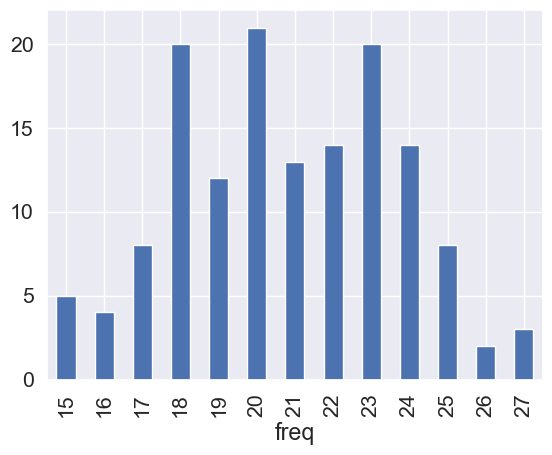

,freq
0,27
1,16
2,22
3,18
4,20


In [6]:
shuffle(onlyfiles)
ages = [i.split('_')[0] for i in onlyfiles]
print (len(ages))

elements_count = {}
# iterating over the elements for frequency
for element in ages:
   # checking whether it is in the dict or not
   if element in elements_count:
      # incerementing the count by 1
      elements_count[element] += 1
   else:
      # setting the count to 1
      elements_count[element] = 1
# printing the elements frequencies
for key, value in elements_count.items():
   print(f"{key}: {value}")

import pandas as pd

df = pd.DataFrame({'freq': ages})
df.groupby('freq', as_index=True).size().plot(kind='bar')
plt.show()
df.head()

In [7]:
filepaths = pd.Series(onlyfiles, name='Filepath').astype(str)
ages = pd.Series(ages, name='Age').astype(np.int32)

images = pd.concat([filepaths, ages], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [8]:
df_age = pd.DataFrame({'Ages': ages})

Age: 20


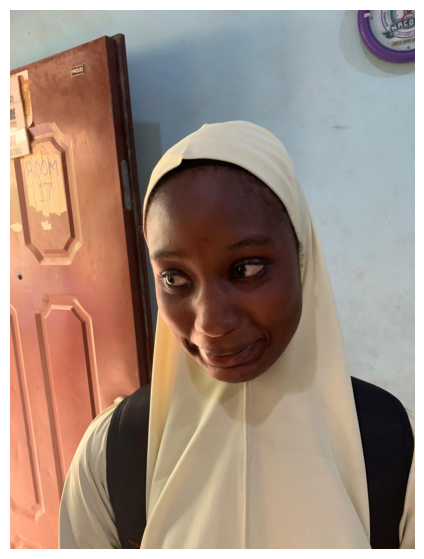

In [9]:
def visualize(image):
    plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.imshow(image)

#choose an image id to see its age
image_id = 1
image_example_path = images.iloc[image_id].Filepath
age = images.iloc[image_id].Age

print(f'Age: {age}')
image = cv2.imread(image_example_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

In [10]:

classes = []
for i in ages:
  if(i!="model.png"):
      i = int(i)
      
      if (i>=15) and (i<=17):
          classes.append(0)
      if (i>=18) and (i<=25):
          classes.append(1)
      if (i>=26) and (i<=30):
          classes.append(2)
            
            
classes[:3]

categorical_labels = to_categorical(classes, num_classes=3)
categorical_labels.shape

(144, 3)

In [11]:

X_data =[]
for file in onlyfiles:
  if(file !="model.png"):
      img=imageio.imread(file,pilmode="RGB")
      img =cv2.resize(img, (224,224))
      X_data.append(img)



X = np.squeeze(X_data)
X.shape


# normalize data
X = X.astype('float32')
X /= 255

C:\Users\Gilbert\AppData\Local\Temp\ipykernel_16844\3494566904.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imageio.imread(file,pilmode="RGB")
  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [187 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\PIL
  copying src\PIL\BdfFontFile.py -> build\lib.win-amd64-cpython-311\PIL
  copying src\PIL\BlpImagePlugin.py -> build\lib.win-amd64-cpython-311\PIL
  copying src\PIL\BmpImagePlugin.py -> build\lib.win-amd64-cpython-311\PIL
  copying src\PIL\BufrStubImagePlugin.py -> build\lib.win-amd64-cpython-311\PIL
  copying src\PIL\ContainerIO.py -> 

  Using cached Pillow-9.0.0.tar.gz (49.5 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for Pillow
Failed to build Pillow


In [ ]:
from sklearn.model_selection import train_test_split
train_test_split(X, ages,categorical_labels, test_size=1 - train_ratio)

In [12]:
agelabel=np.array(ages)

agelabel[3]

18

In [14]:
yhat = model_reg.predict(X)
true_ages=ages



from sklearn.metrics import mean_squared_error 
# Calculation of Mean Squared Error (MSE)
mse= mean_squared_error(true_ages ,yhat)

print ("The MSE",mse)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(true_ages ,yhat)
print ("The MAE",mae)

rmse = np.sqrt(mse)

print ("this is the rmse",rmse )
from sklearn.metrics import r2_score
r2 = r2_score(true_ages,yhat )
print("Test R^2 Score: {:.5f}".format(r2))


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 301ms/step
The MSE 8.604532860858349
The MAE 1.9133988221486409
this is the rmse 2.9333484042742604
Test R^2 Score: -0.07154


In [ ]:
true_ages

array([18])

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 433ms/step
[[11  6  0]
 [12 98 12]
 [ 0  2  3]]
(144, 3)


<Axes: >

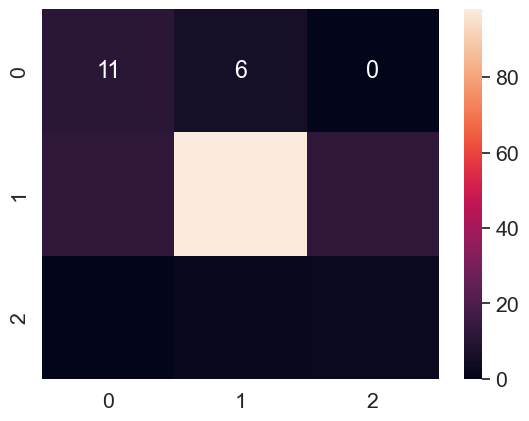

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

yhat = model_class.predict(X)
true_ages=categorical_labels

y_pred=np.argmax(yhat, axis=1)
y_test=np.argmax(true_ages, axis=1)
cm_class = confusion_matrix(y_test, y_pred)
print(cm_class)
print(yhat.shape)
import seaborn as sns
sns.heatmap(cm_class, fmt="d", annot=True)

              precision    recall  f1-score   support

           0       0.48      0.65      0.55        17
           1       0.92      0.80      0.86       122
           2       0.20      0.60      0.30         5

    accuracy                           0.78       144
   macro avg       0.53      0.68      0.57       144
weighted avg       0.85      0.78      0.80       144



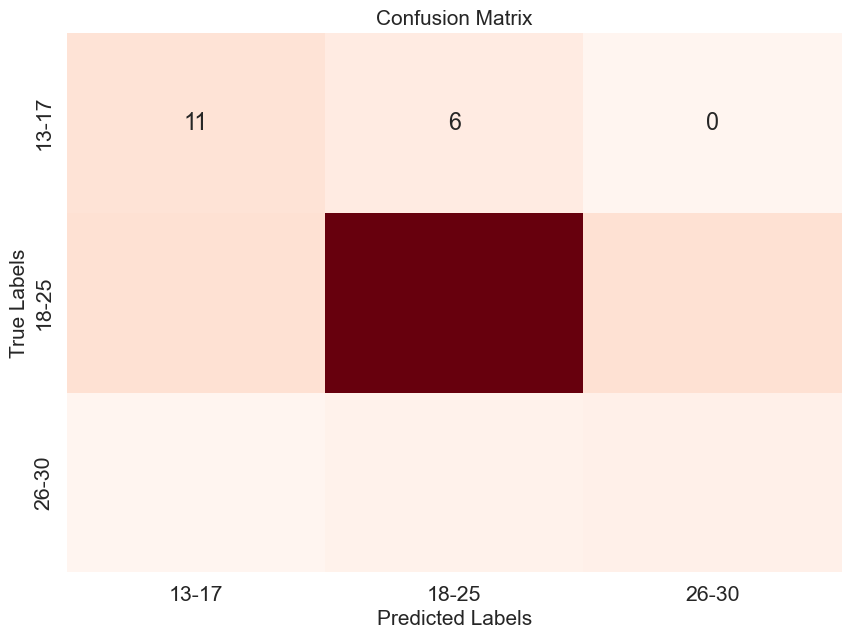

In [18]:
from sklearn.metrics import classification_report

predicted_classes = np.argmax(yhat, axis=1)
true_classes = np.argmax(true_ages, axis=1)
report = classification_report(true_classes, predicted_classes)
print (report)



import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Given confusion matrix
cm = np.array([[11, 6, 0],
               [12, 98, 12],
               [0, 2, 3]])

# Define the labels for the confusion matrix
labels = ['13-17', '18-25', '26-30']

# Create a heatmap using seaborn
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds', cbar=False,
            xticklabels=labels, yticklabels=labels)

# Add labels, title, and ticks
plt.xlabel('Predicted Labels', fontsize=15)
plt.ylabel('True Labels', fontsize=15)
plt.title('Confusion Matrix', fontsize=15)

# Show the plot
plt.show()
